## Dask

<img src="images/collections-schedulers.png" width="600" align="middle">

Dask is an Open Source project that gives you abstractions over NumPy Arrays, Pandas Dataframes and regular lists, allowing you to run operations on them in parallel, using multicore processing.

source: https://towardsdatascience.com/trying-out-dask-dataframes-in-python-for-fast-data-analysis-in-parallel-aa960c18a915

### Dask.array looks and feels = NumPy


You can create a dask.array Array object with the da.from_array function. This function accepts

- data: Any object that supports NumPy slicing, like dset
- chunks: A chunk size to tell us how to block up our array, like (1000000,)

In [2]:
import numpy as np
import dask.array as da

In [3]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
da.arange(10, chunks=5)

dask.array<arange, shape=(10,), dtype=int64, chunksize=(5,)>

In [5]:
da.arange(10, chunks=5).compute()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### 1D array of ones

This divides an array of 15 elements into three blocks, each of size 5:
```
da.ones(15, chunks=(5,))
``` 
    

In [6]:
x = da.ones(15, chunks=(5,))
x

dask.array<ones, shape=(15,), dtype=float64, chunksize=(5,)>

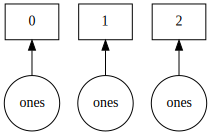

In [7]:
x.visualize('dask.svg')

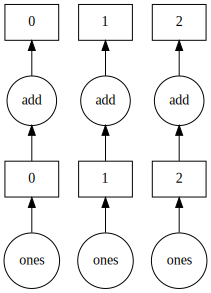

In [8]:
(x + 1).visualize('dask.svg')

### Something more complex ...

chunks=(3, 2): Asymmetric but repeated blocks of size (3, 2):

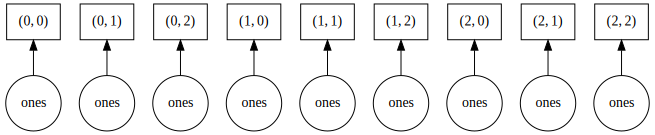

In [9]:
x = da.ones((15, 15), chunks=(5,5)) #matrix
x.visualize('dask.svg')

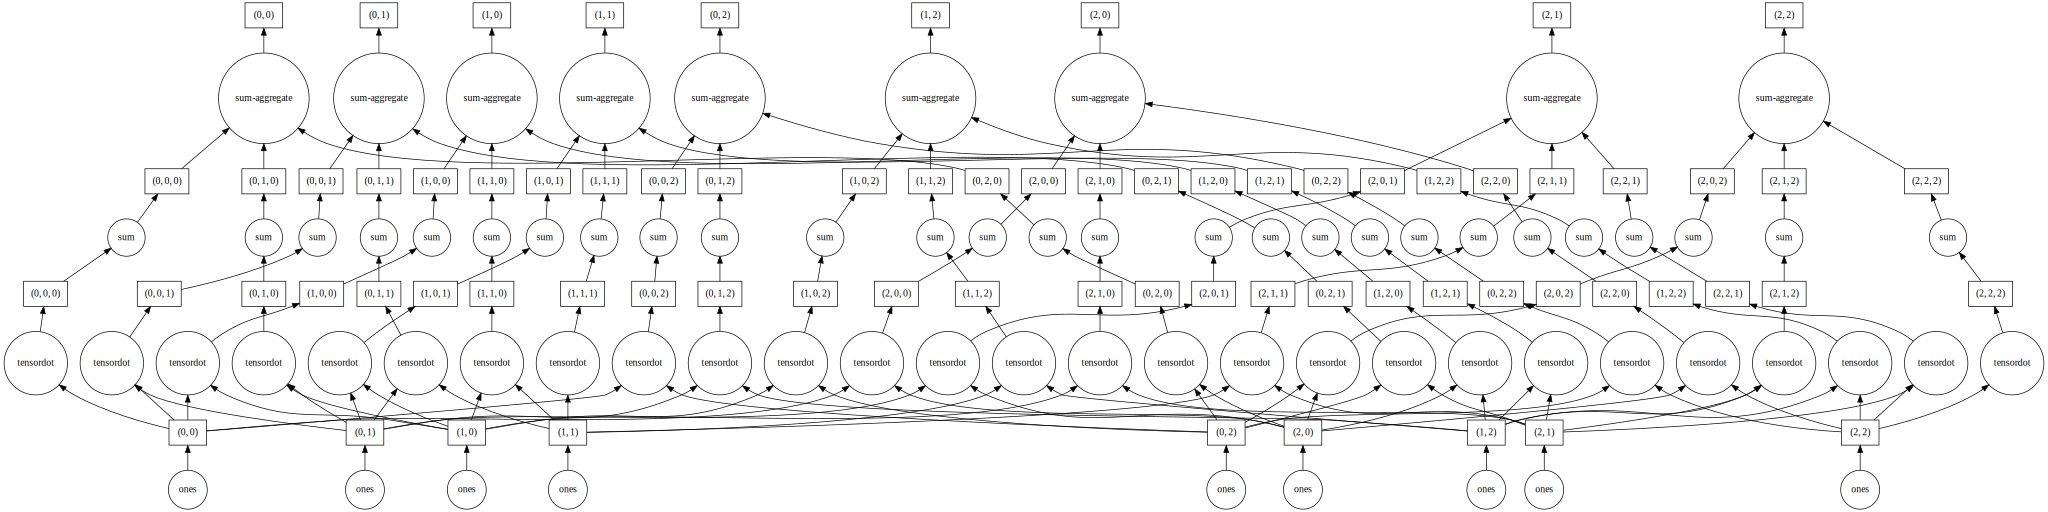

In [10]:
(x.dot(x)).visualize('dask.svg')

## Numpy vs Dask

In [11]:
%%time
np_data = np.random.normal(1, size=(5000, 50000))
np_data[::50].mean(axis=0)
print("Se usaron {:.2f} GB de RAM".format(np_data.nbytes / 1024**3))

Se usaron 1.86 GB de RAM
CPU times: user 10.9 s, sys: 900 ms, total: 11.8 s
Wall time: 11.9 s


In [12]:
%%time
da_data = da.random.normal(1, size=(5000, 5000), 
                           chunks=(100, 100))
da_data[::50].mean(axis=0).compute()

CPU times: user 2.9 s, sys: 1.85 s, total: 4.75 s
Wall time: 4.7 s


# Tools for Diagnostics

In [13]:
from bokeh.plotting import output_notebook
output_notebook()


Loading BokehJS ...

In [14]:
from dask.diagnostics import (Profiler, ResourceProfiler,visualize, ProgressBar)

ProgressBar().register()

In [15]:
with Profiler() as prof, ResourceProfiler(dt=0.2) as rprof:
    da_data[::50].mean(axis=0).compute()
visualize([prof, rprof], save=False);

[########################################] | 100% Completed |  6.6s


### Referencias
---

https://github.com/dask/dask-tutorial

https://github.com/arielrossanigo/procesando_datos_en_paralelo_con_dask